### Lab 7 Multiple Linear Regression

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [75]:
# read data
cars = pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [76]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [77]:
#checking  null
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [78]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


### Scatterplot between variables along histograms

c:\Users\HOME\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


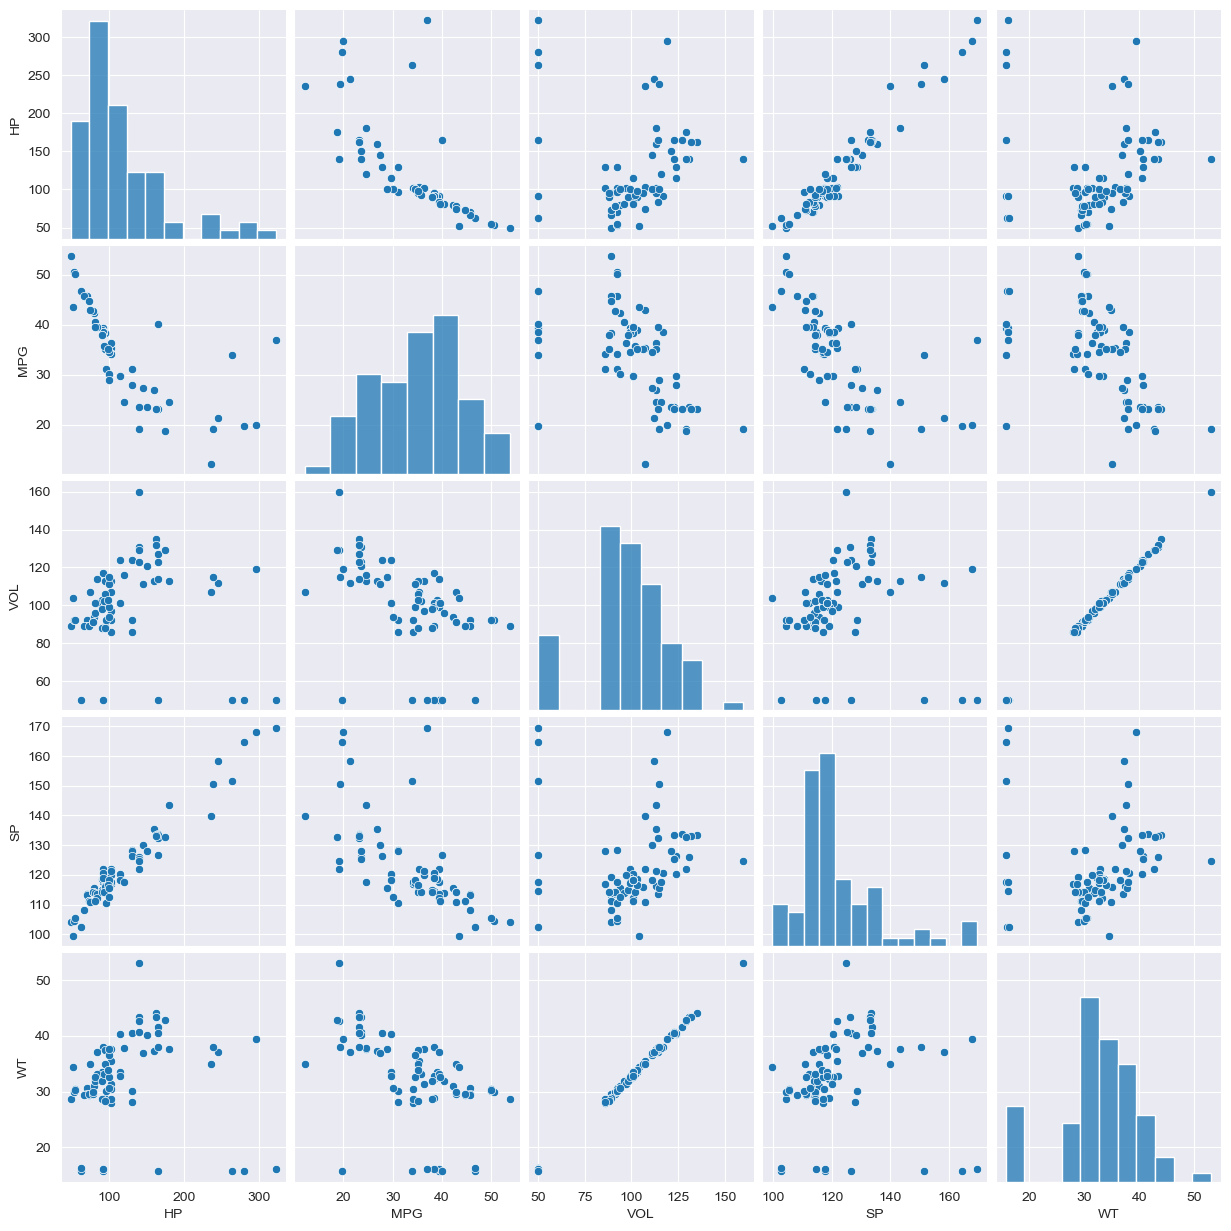

In [79]:
# format plot background and scatter plot for all variable

sns.set_style(style='darkgrid')
sns.pairplot(cars)

## Preparing model

In [80]:
import statsmodels.formula.api as smf

# Assuming 'cars' is your DataFrame containing the data
model = smf.ols('MPG ~ WT + VOL + SP + HP', data=cars).fit()


In [81]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [82]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [83]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

### Simple Linear Regression

In [84]:
import statsmodels.formula.api as smf

# Fit the linear regression model
ml_v = smf.ols('MPG ~ VOL', data=cars).fit()

# Print t-values and p-values
print(ml_v.tvalues, '\n', ml_v.pvalues)


Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [85]:
ml_w = smf.ols('MPG ~ WT',data=cars).fit()
print(ml_w.tvalues,'\n',ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [86]:
ml_wv = smf.ols('MPG~WT+VOL',data=cars).fit()
print(ml_wv.tvalues,'\n',ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


## Calculating VIF

In [87]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~HP+WT+SP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol) # 16.33

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp) # 16.33

#storing vif values in dataframe
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
d1_frame = pd.DataFrame(d1)
d1_frame


,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


## Residual Analysis

### Test for normality of residuals (Q-Q plot)

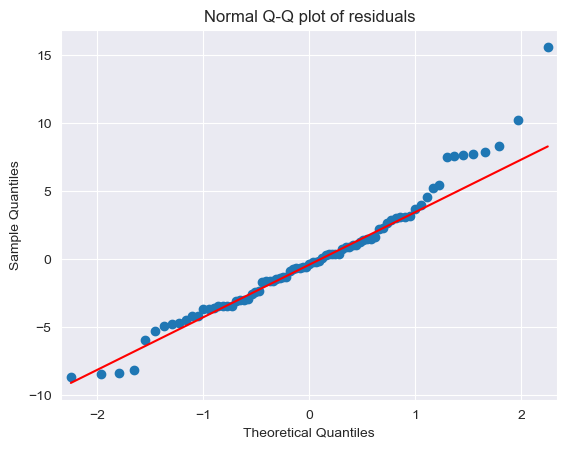

In [88]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q') # line = 45 to draw diagonal line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [89]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

### Residual Plot for Homoscedasticity

In [90]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

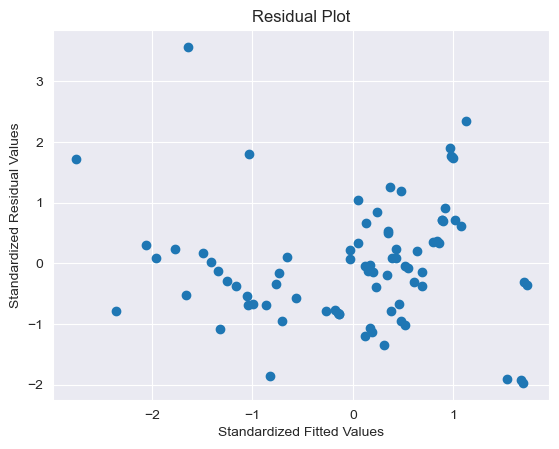

In [91]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

## Residual VS Regressors

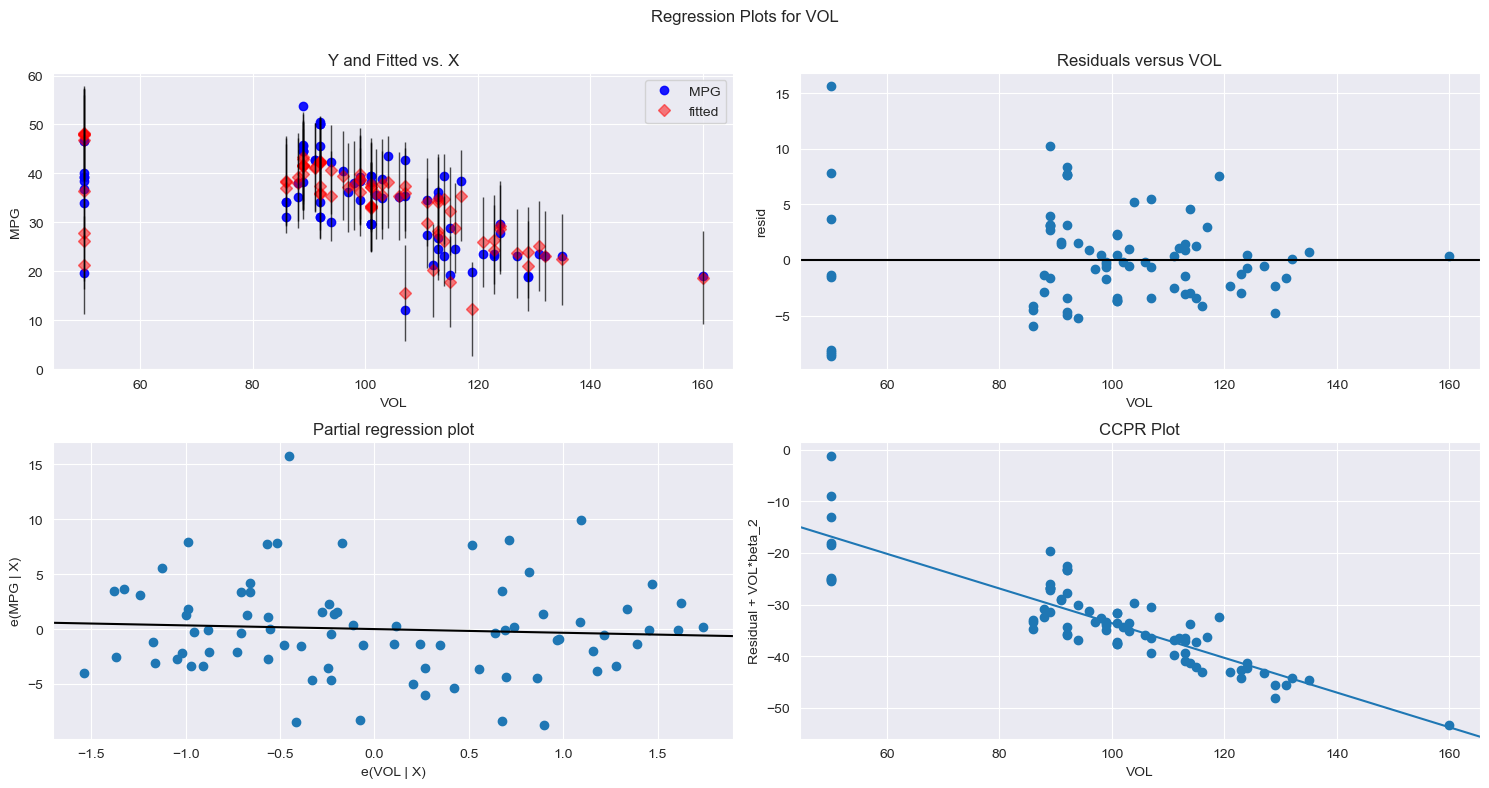

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

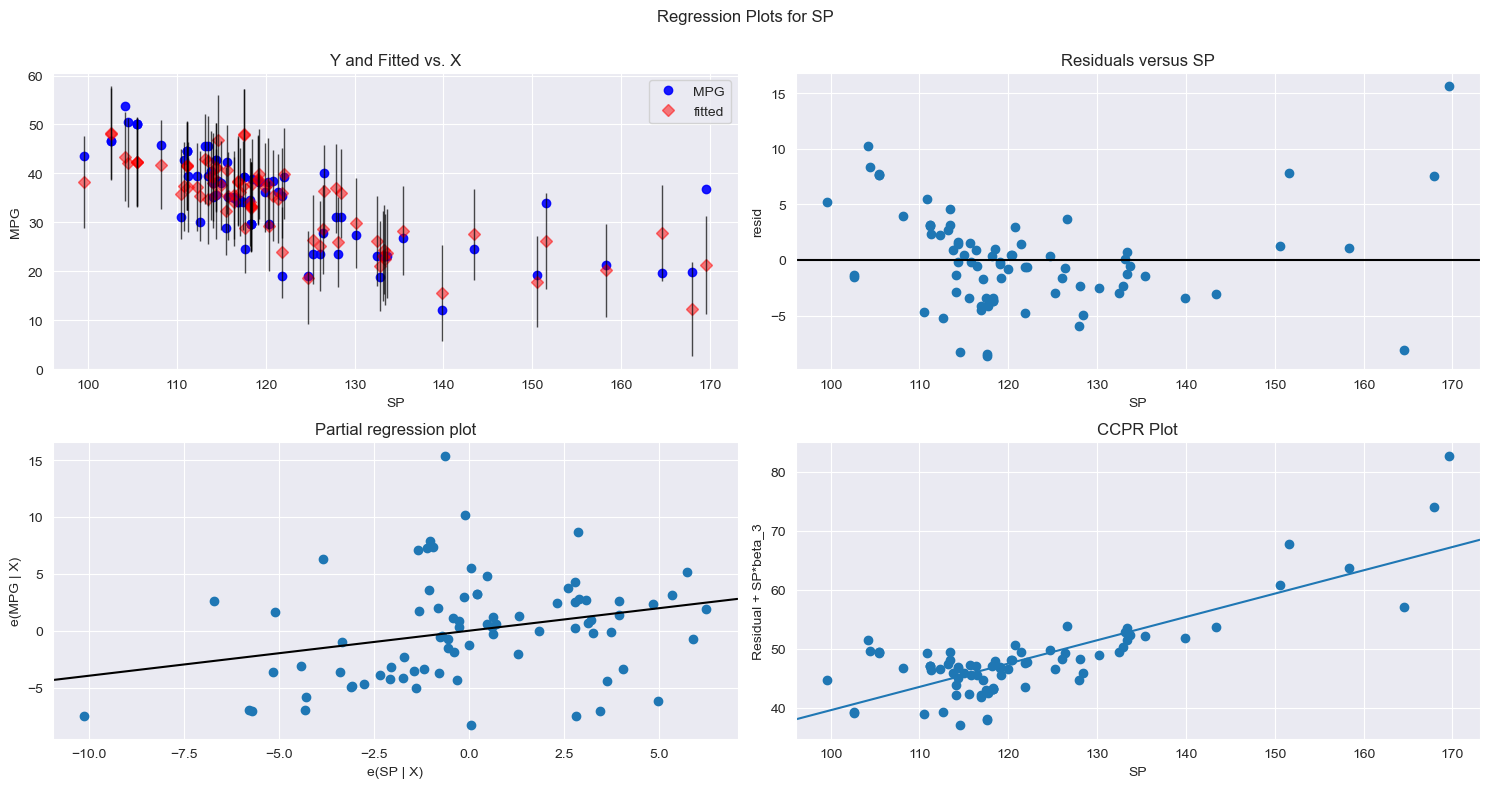

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

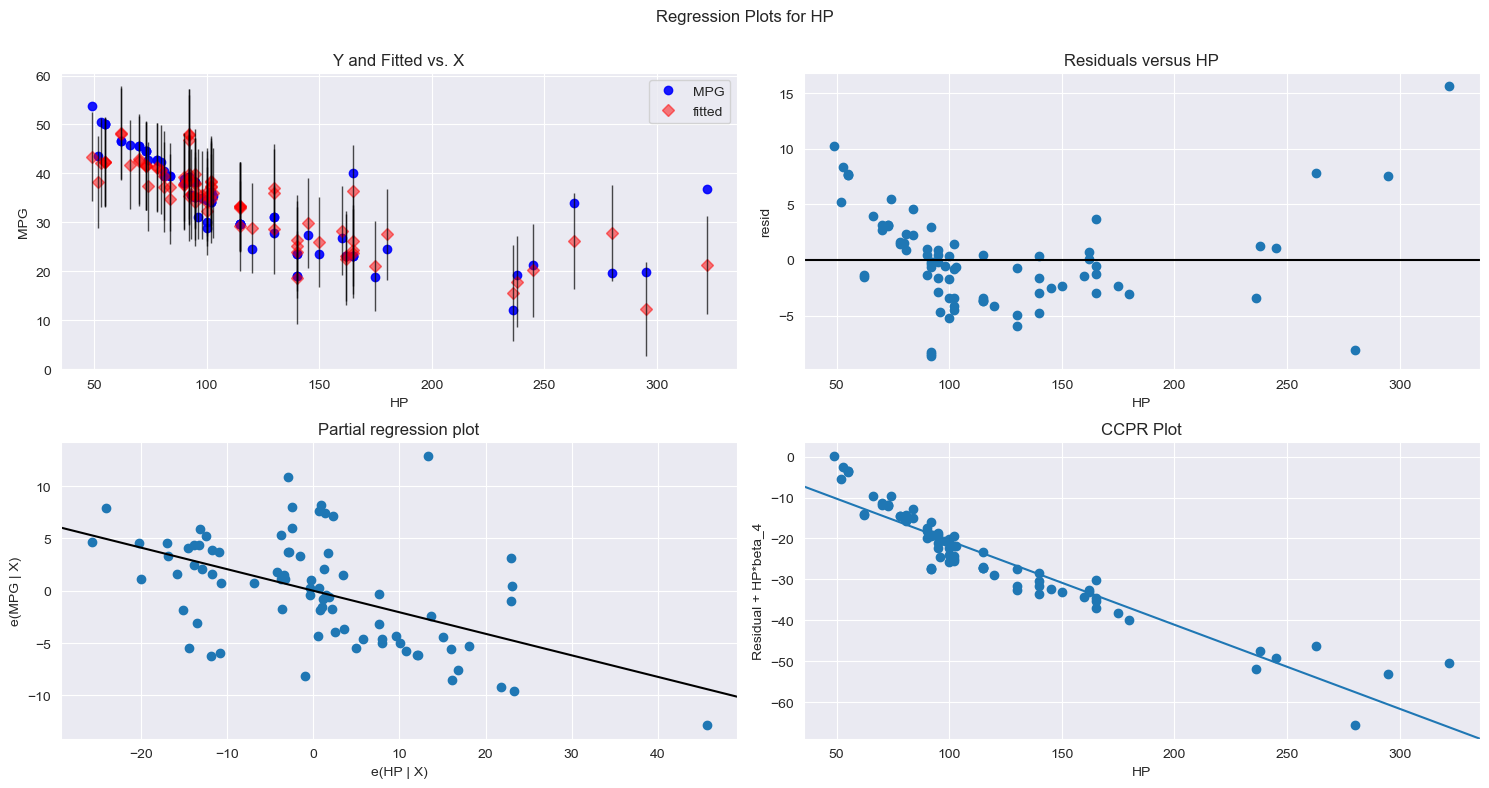

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

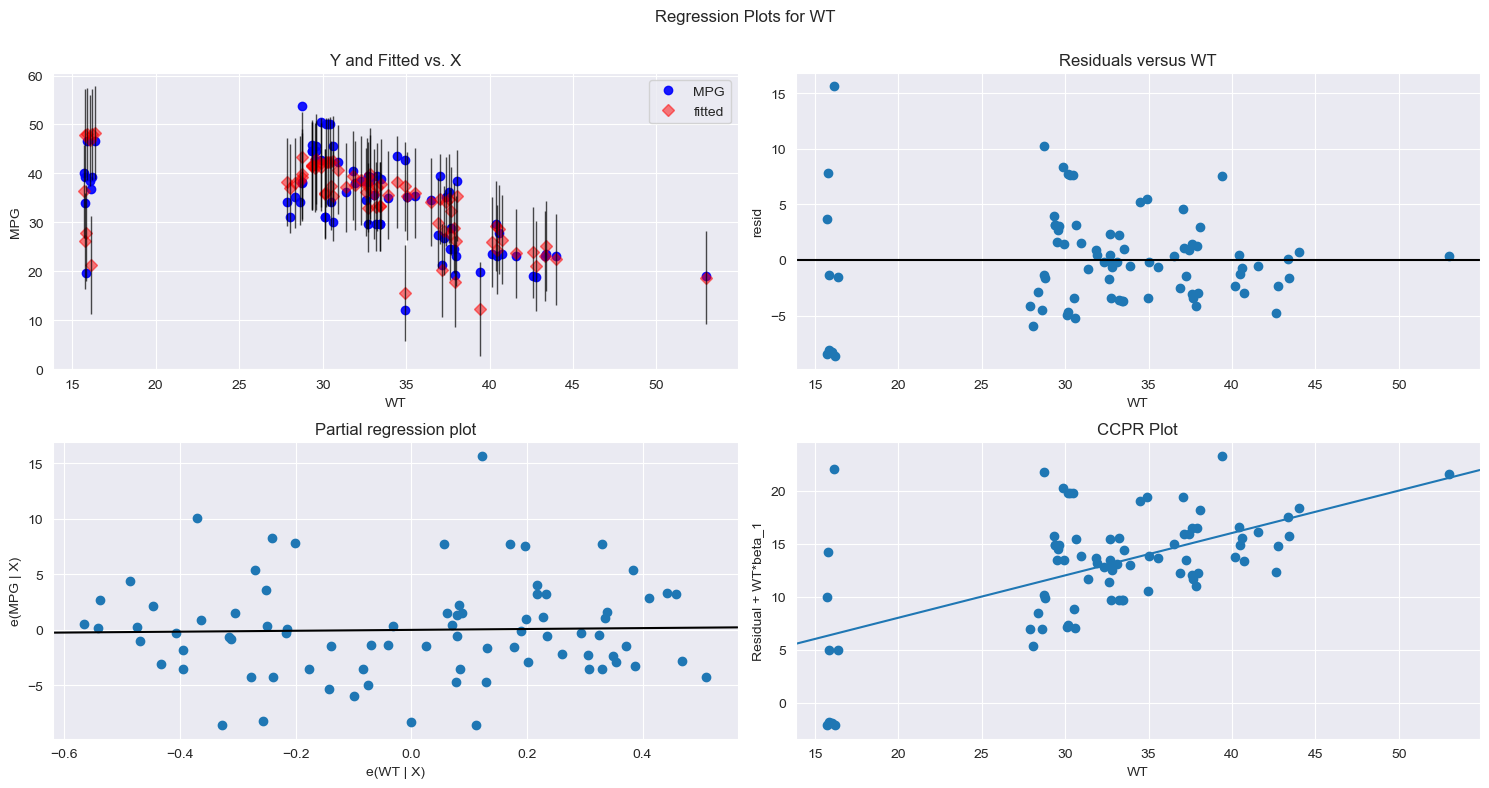

In [95]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

## Model Detection Diagnostics

### Detecting Influences/Outliers

### Cook's Distance

In [96]:
model_influence  = model.get_influence()
(c,_)=model_influence.cooks_distance

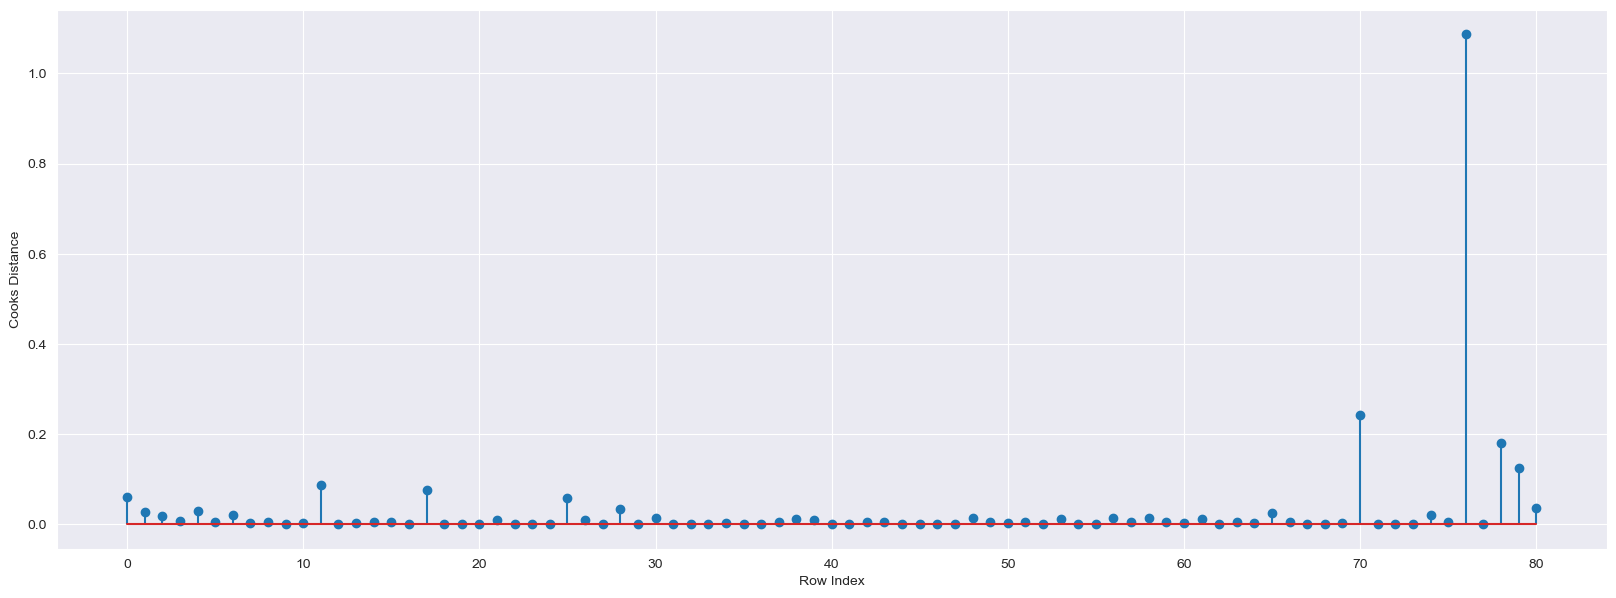

In [97]:
#plot influencers values using stem plot

fig =plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

# distance greater than 1 then outlier

In [98]:
# index and value of outlier
(np.argmax(c),np.max(c))

(76, 1.0865193998180098)

## High influence points


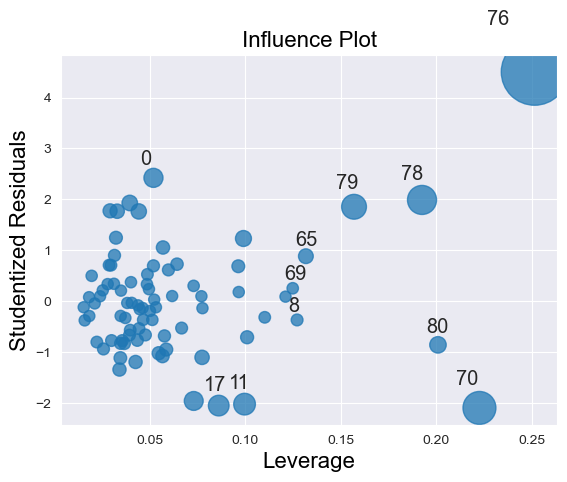

In [99]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [100]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n) 

In [101]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [102]:
# See differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


### Improving Model

In [103]:
# Load data
cars_new = pd.read_csv('Cars.csv')


In [104]:
# Discard datapoints which are influences and reassign row number(reset_index())
car1 = cars_new.drop(cars.index[[70,76]],axis=0).reset_index()

In [105]:
#drop original index
car1=car1.drop(['index'],axis=1)

In [106]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


## Build Model

In [107]:
#Exclude variable 'WI' and generate R-squared and AIC Values
import statsmodels.formula.api as smf

# Fit the linear regression model excluding 'WI'
final_ml_v = smf.ols('MPG ~ VOL + SP + HP', data=car1).fit()

# Get R-squared and AIC values
r_squared = final_ml_v.rsquared
aic = final_ml_v.aic

print("R-squared:", r_squared)
print("AIC:", aic)


R-squared: 0.8161692010376007
AIC: 446.11722639447726


#### Comparing Above rsquare and AIC

### COOK's Distance

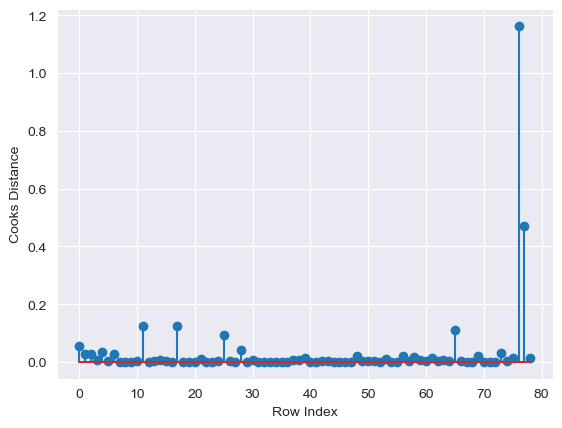

In [108]:
model_influence_v = final_ml_v.get_influence()
(c_v,_)=model_influence_v.cooks_distance
plt.stem(np.arange(len(car1)),np.round(c_v,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

In [109]:
#index of data where c > 0.5
(np.argmax(c_v),np.max(c_v))

(76, 1.1629387469135182)

In [110]:
#drop 76 and 77
car2= car1.drop(car1.index[[76,77]],axis=0)

In [111]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [112]:
#reset index
car3 =car2.reset_index()

In [113]:
car4 = car3.drop(['index'],axis=1)

In [114]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [115]:
#build model
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=car4).fit()

In [116]:
# Again check for influencers
model_influence_v =final_ml_v.get_influence()
(c_v,_) = model_influence_v.cooks_distance

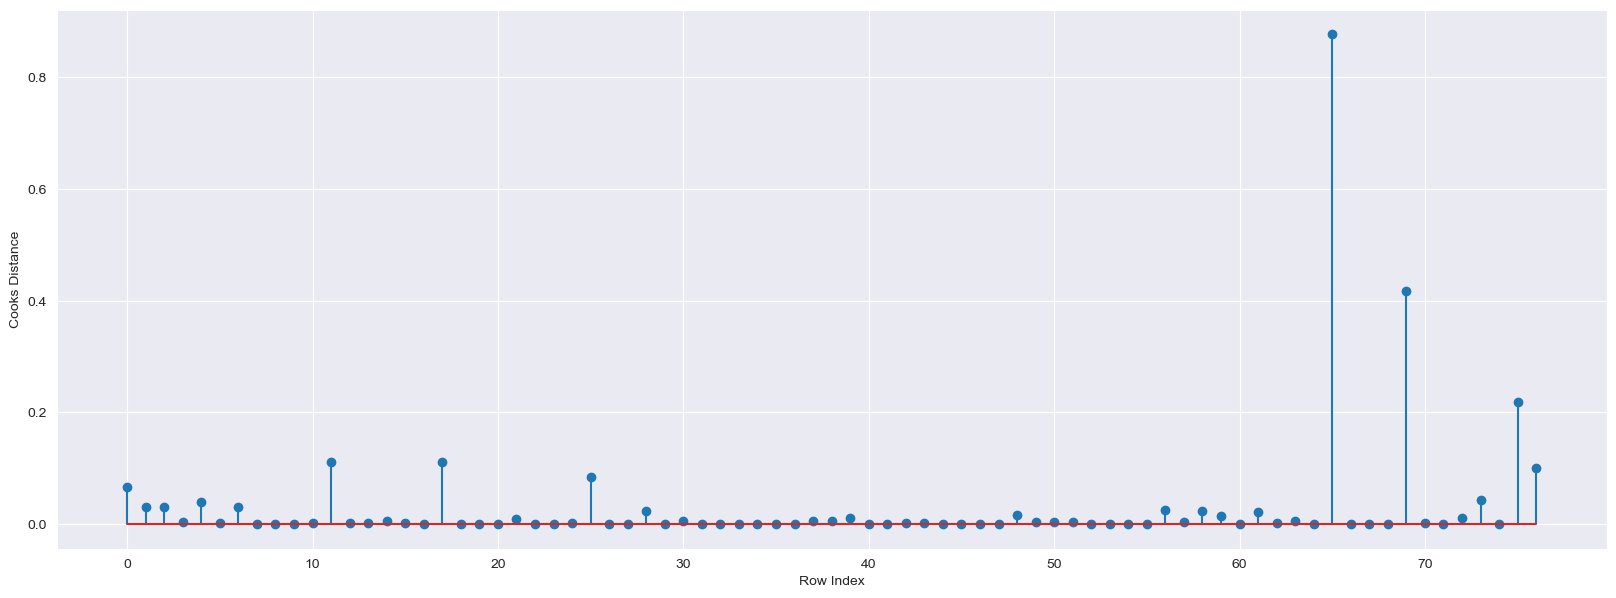

In [117]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_v,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

In [118]:
#index of data where c > 0.5
(np.argmax(c_v),np.max(c_v))

(65, 0.8774556986296786)

#### Since value less than 1 we can stop diagnostic process and finalize the model

In [119]:
# check accurancy of the model
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=car4).fit()

In [120]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8669636111859063, 409.4153062719507)

### Predicting for new data

In [121]:
# new data for prediction
new_data = pd.DataFrame({'HP':40,'VOL':95,"SP":102,"WT":35},index =[1])

In [122]:
final_ml_v.predict(new_data)

1    46.035594
dtype: float64

In [123]:
final_ml_v.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [124]:
pred_y=final_ml_v.predict(cars_new)

In [125]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64